In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets

In [10]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Basic Info

In [11]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [12]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [13]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


# Check for duplicate rows in the dataset

In [28]:
print(customers.duplicated().sum())
print(transactions.duplicated().sum())

0
0


# Add a summary of missing values

In [29]:
print(customers.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Handling missing values

In [14]:
customers = customers.dropna()

In [15]:
transactions = transactions.dropna()

# Convert date columns to datetime

In [16]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [17]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Summary statistics

In [18]:
print(transactions.describe())

                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


In [19]:
print(products.describe())

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


# Plotting product prices distribution

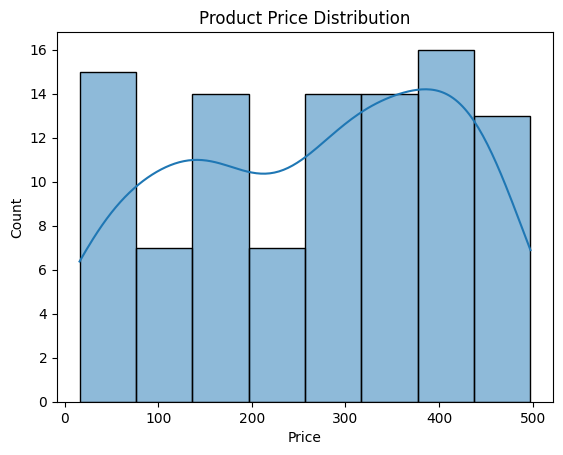

In [26]:
sns.histplot(products['Price'], kde=True)
plt.title('Product Price Distribution')
plt.show()

# Customer regions distribution

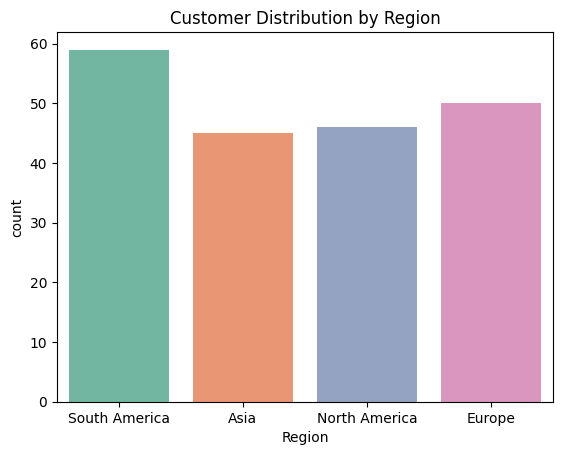

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Customer distribution by region
sns.countplot(x='Region', data=customers, hue='Region', palette='Set2', legend=False)
plt.title('Customer Distribution by Region')
plt.show()

# Total transaction values over time

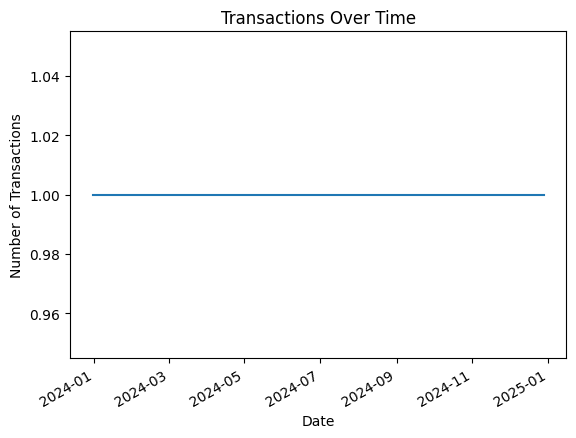

In [22]:
transactions['TransactionDate'].value_counts().sort_index().plot(kind='line')
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

# Customer Tenure Analysis

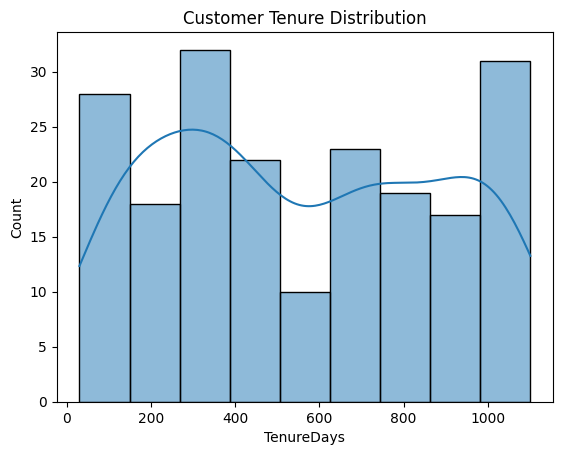

In [33]:
customers['TenureDays'] = (pd.Timestamp.now() - customers['SignupDate']).dt.days
sns.histplot(customers['TenureDays'], kde=True)
plt.title('Customer Tenure Distribution')
plt.show()


# Transaction Value Distribution

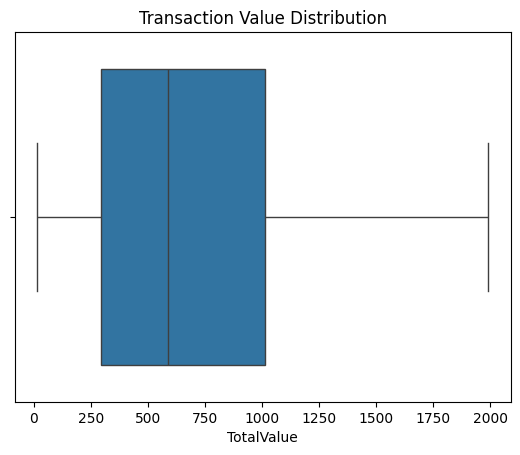

In [34]:
sns.boxplot(x=transactions['TotalValue'])
plt.title('Transaction Value Distribution')
plt.show()
